In [5]:
# Required Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
from metrics import createGrid

%matplotlib inline

In [6]:
# Import Street Map
street_map = gpd.read_file("Detailnetz-Strassenabschnitte.geojson")

# Set CRS value
crs = {'init' : 'epsg:4326'}

# Used to obtain the total bounds of the street file
# Not used for now as the bounds are hard coded within the metrics.py file to improve load times
# xmin, ymin, xmax, ymax = street_map.total_bounds

#Desired Edge Length in KM
edgeLength = 4

# Create gridcells - done through createGrid() method contained within metrics.py
gridcells = createGrid(edgeLength)

# Convert the gridcells to a GeoDataFrame
cell = gpd.GeoDataFrame(gridcells, columns=['geometry'], crs = crs)


c:\Users\sahil\anaconda3\envs\maps\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\sahil\anaconda3\envs\maps\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
# Enter the ride file name in this variable as a string
rideName = "VM2_-76660491"

#User taken path
user = pd.read_csv(f"FilteredData\{rideName}-filtered.csv")

#Reccomended Path
rec = pd.read_csv(f"geoJSONCSV\{rideName}-efficientpath.csv")


c:\Users\sahil\anaconda3\envs\maps\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\sahil\anaconda3\envs\maps\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(13.054691127550086, 13.836910108096303, 52.31985019498741, 52.676126698701076)

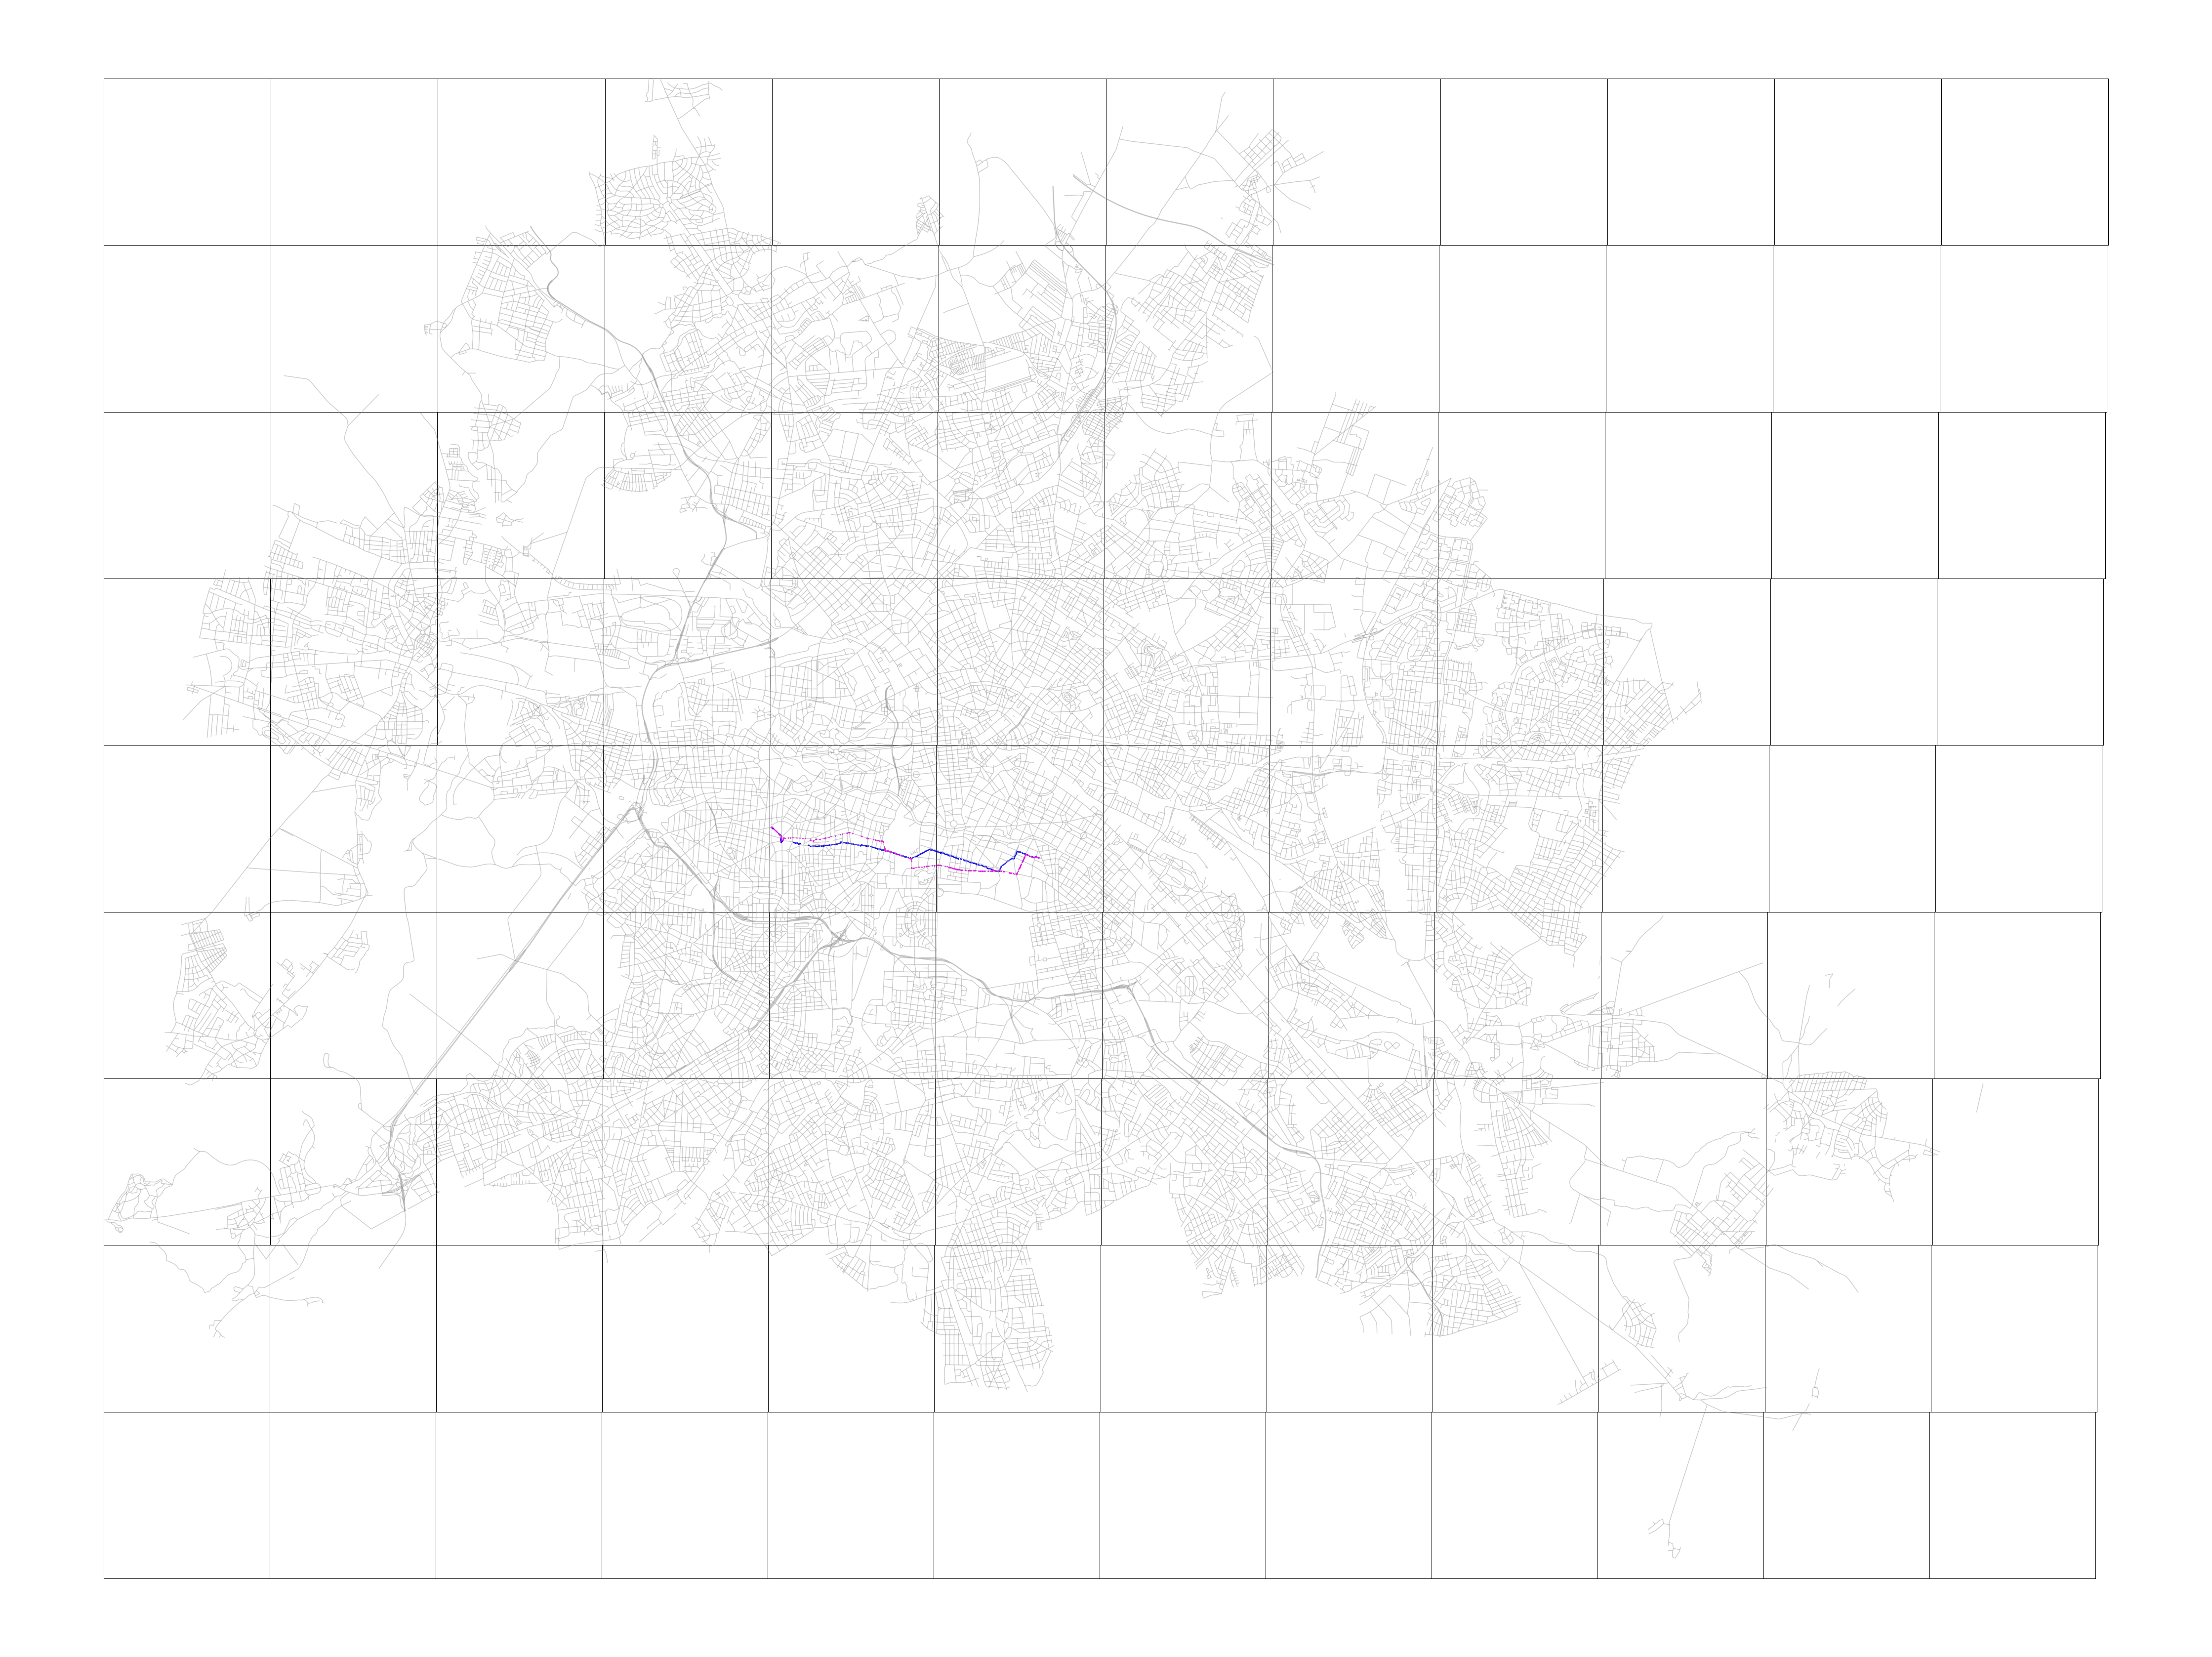

In [8]:
#Geometry for user taken path
userGeometry = [Point(xy) for xy in zip( user["long"], user["lat"])]
userGeoFrame = gpd.GeoDataFrame(user, crs=crs, geometry=userGeometry)

#Geometry for recommended path
recGeometry = [Point(xy) for xy in zip(rec["long"], rec["lat"])]
recGeoFrame = gpd.GeoDataFrame(rec, crs=crs, geometry=recGeometry)

# Setting up figure parameters
fig,ax = plt.subplots(figsize = (80,80))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
userGeoFrame.plot(ax = ax, markersize = 10, color = "blue", marker = ".", )
recGeoFrame.plot(ax = ax, markersize = 10, color = "magenta", marker = ".", )
cell.plot(ax = ax, facecolor= 'none', edgecolor = 'black')

# Axis control - Comment out to display axis
ax.axis("off")
